# import & def

In [184]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

plt.style.use('ggplot')
warnings.filterwarnings(action='ignore')

In [185]:
def cnt_plot(data, col, title):
    plt.rc('font', family='Malgun Gothic')
    plt.rc("axes",unicode_minus=False)
    plt.figure(figsize=(10,5))
    plt.xticks(rotation=40)
    ax=sns.countplot(x=col, hue='Attrition' ,data = data, palette='Set2_r')
    for p in ax.patches:
        ax.annotate("%.0f"%p.get_height(),(p.get_x() + p.get_width()/2, p.get_height()-10),
                   ha='center', va='center', fontsize=11, color='black', xytext=(0,10),
                   textcoords='offset points')
    plt.title(title)
    plt.show()

In [186]:
def bar_plot(data, col,col2, title):
    plt.rc('font', family='Malgun Gothic')
    plt.rc("axes",unicode_minus=False)
    plt.figure(figsize=(20,7))
    plt.xticks(rotation=40)
    ax=sns.barplot(x=col, y = col2 ,data = data, palette='Set2_r')
    for p in ax.patches:
        ax.annotate("%.0f"%p.get_height(),(p.get_x() + p.get_width()/4, p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0,10),
                   textcoords='offset points')
    plt.title(title)
    plt.show()

In [187]:
def outlier(data,col):
    temp=[]
    dt=pd.DataFrame()
    data_col=data[col]
    quan25=np.percentile(data_col.values,25)
    quan75=np.percentile(data_col.values,75)
    iqr=(quan75-quan25)
    outlier1=data_col[(data_col>quan75+iqr*1.5)]
    outlier2=data_col[(data_col<quan25-iqr*1.5)]
    temp += outlier1.index.values.tolist()
    temp += outlier2.index.values.tolist()
    return temp

# 1. 데이터 확인

1. Age : 해당 직원의 나이
2. <span style="color:red">Attrition : 퇴직 여부 Target값 (종속변수)</span>
3. BusinessTravel : 출장의 빈도
4. DailyRate : 일 대비 급여의 수준
5. Department : 업무분야
6. DistanceFromHome : 집과의 거리
7. Education : 교육의 정도
8. EducationField : 전공
9. EmployeeCount : 직원 숫자
10. EmployeeNumber : 직원 ID
11. EnvironmentSatisfaction : 업무 환경에 대한 만족도
12. Gender : 성별
13. HourlyRate : 시간 대비 급여의 수준
14. JobInvolvement : 업무 참여도
15. JobLevel : 업무의 수준
16. JobRole : 업무 종류
17. JobSatisfaction : 업무 만족도
18. MaritalStatus : 결혼 여부
19. MonthlyIncome : 월 소득
20. MonthlyRate : 월 대비 급여 수준
21. NumCompaniesWorked : 일한 회사의 수
22. Over18 : 18세 이상
23. OverTime : 규정외 노동시간
24. PercentSalaryHike : 급여의 증가분 백분율
25. PerformanceRating : 업무 성과
26. RelationshipSatisfaction : 대인관계 만족도
27. StandardHours : 표준 시간
28. StockOptionLevel : 스톡옵션 정도
29. TotalWorkingYears : 경력 기간
30. TrainingTimesLastYear : 교육 시간
31. WorkLifeBalance : 일과 생활의 균형 정도
32. YearsAtCompany : 근속 연수
33. YearsInCurrentRole : 현재 역할의 년수
34. YearsSinceLastPromotion : 마지막 프로모션
35. YearsWithCurrManager : 현재 관리자와 함께 보낸 시간

In [188]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.tail(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum() # null 확인 -> 결측치없음

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.duplicated().sum() # 중복 확인 -> 중복행없음

0

In [56]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
'''
EmployeeCount -> 값 1개만 존재 -> 제거
StandardHours -> 값 1개만 존재 -> 제거
EmployeeNumber -> 직원아이디 -> 제거
'''

# 2. 이상치 확인

In [169]:
int_col = df.describe().columns # int인 칼럼만

In [170]:
int_col = int_col.drop(['EmployeeCount','StandardHours','EmployeeNumber'])

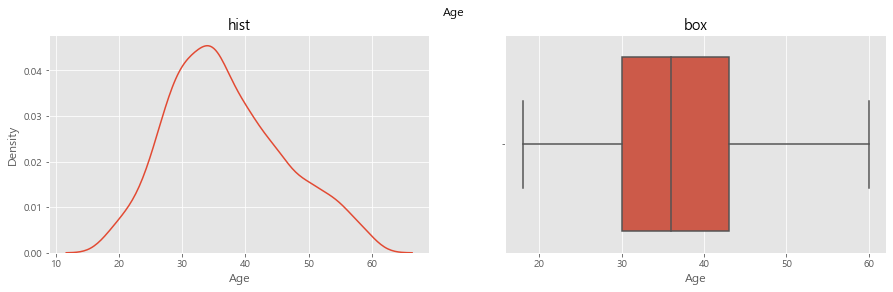

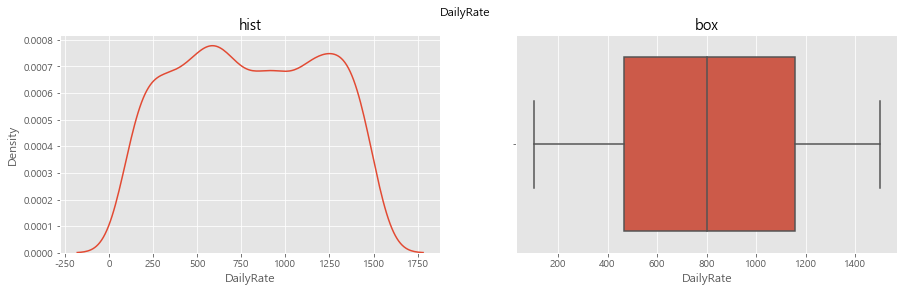

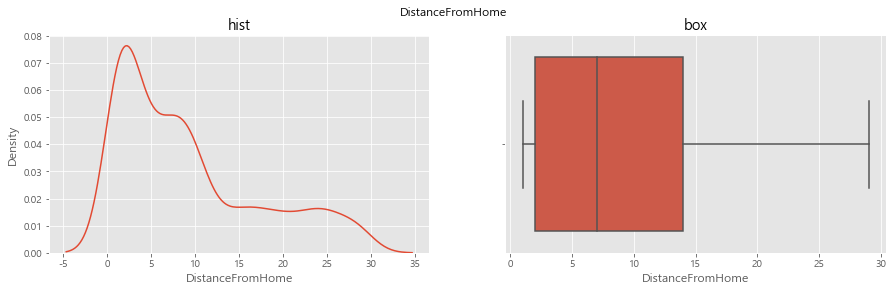

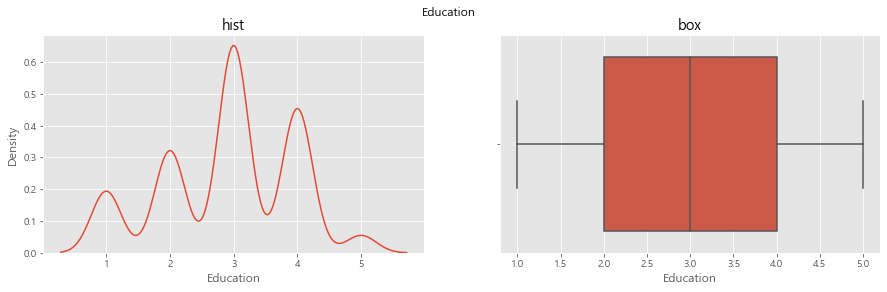

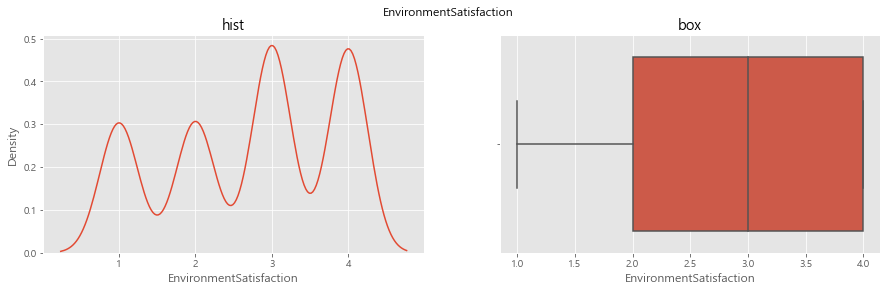

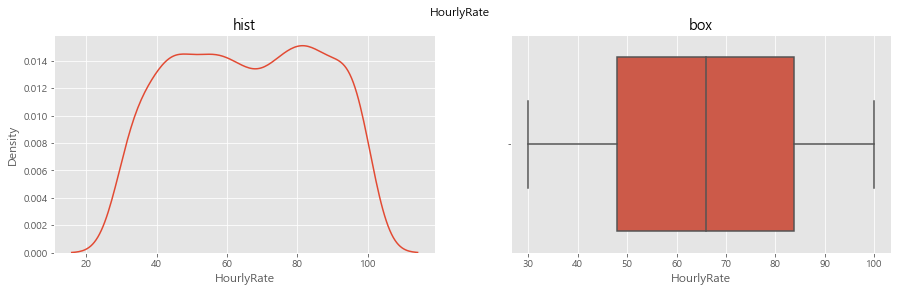

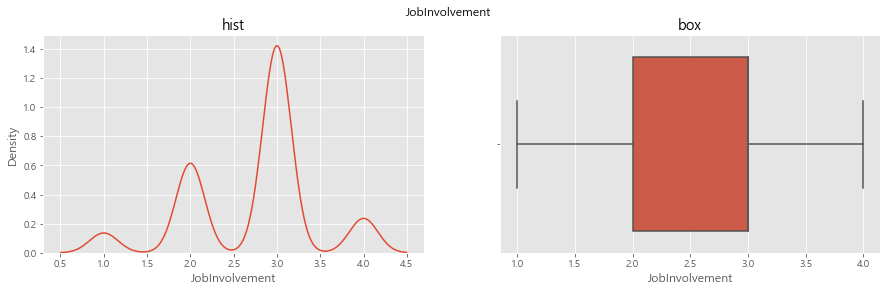

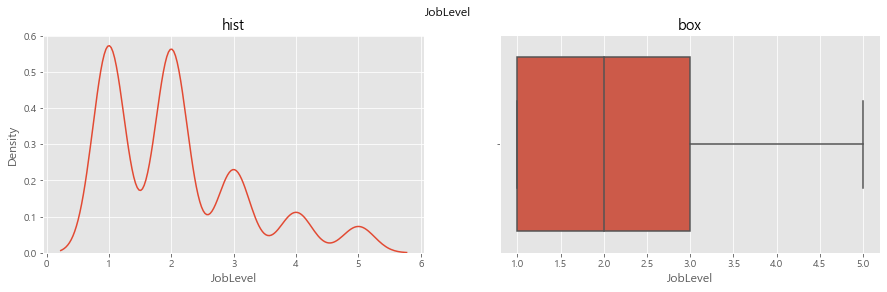

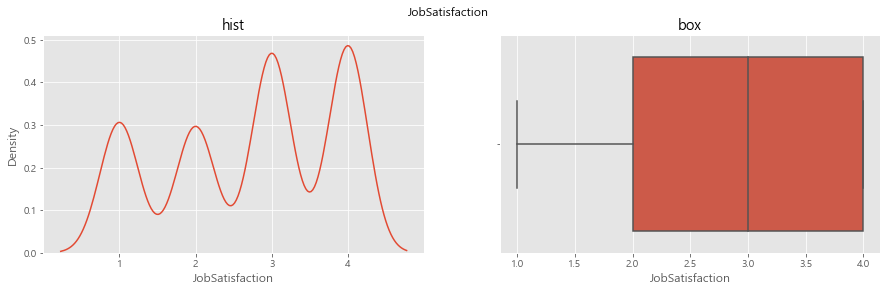

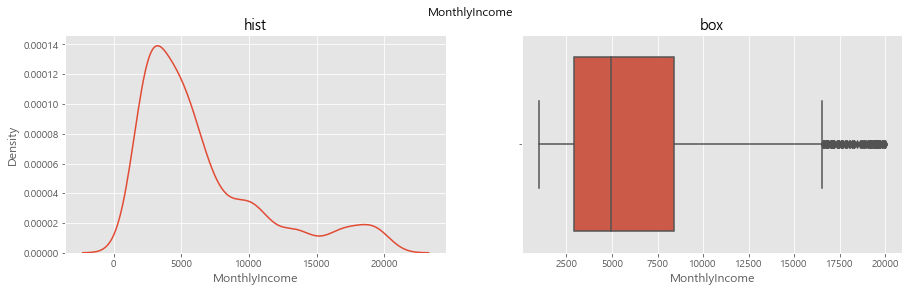

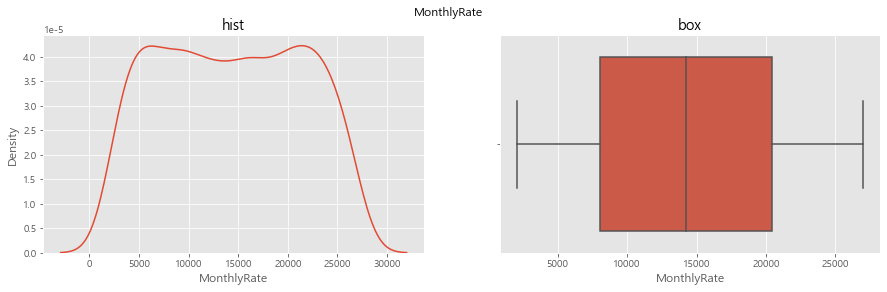

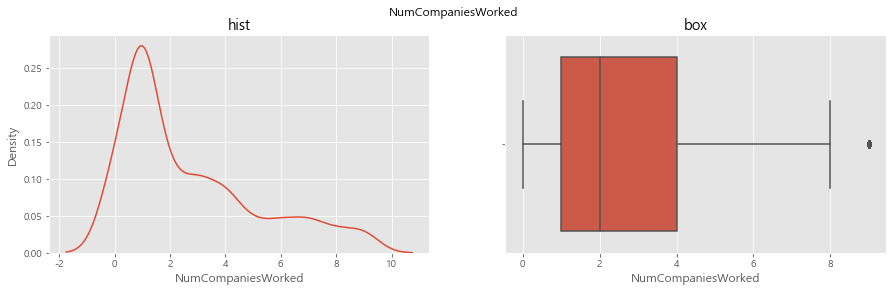

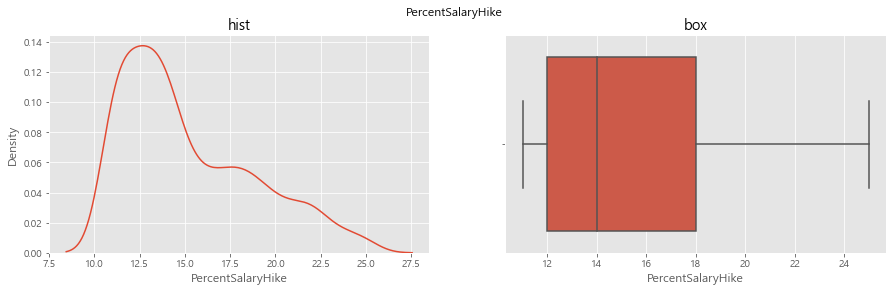

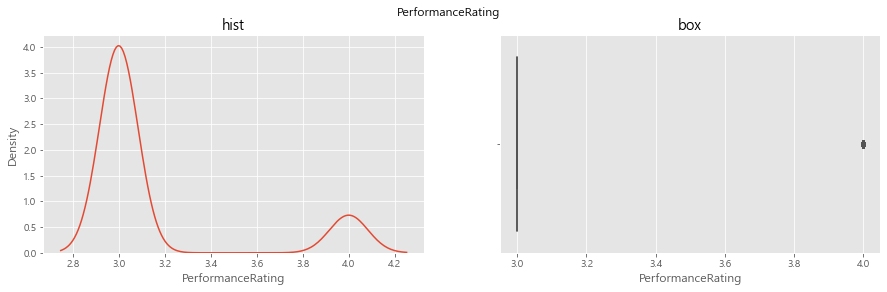

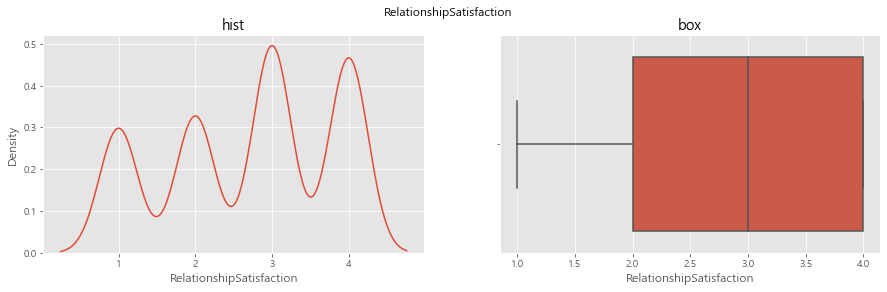

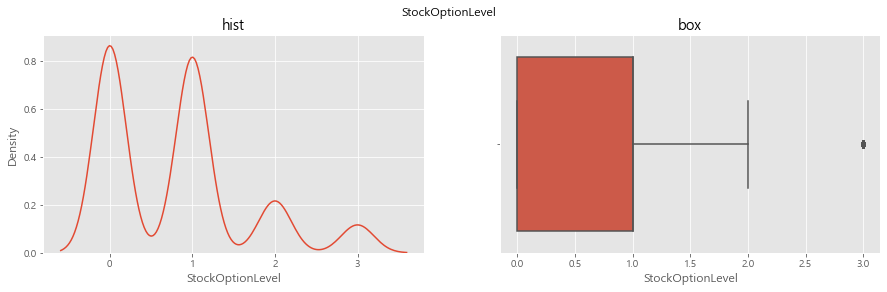

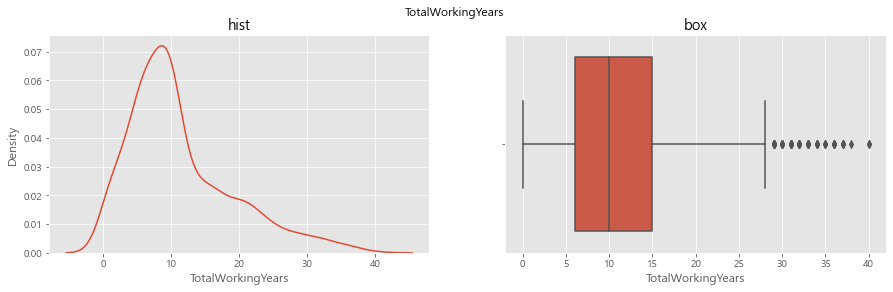

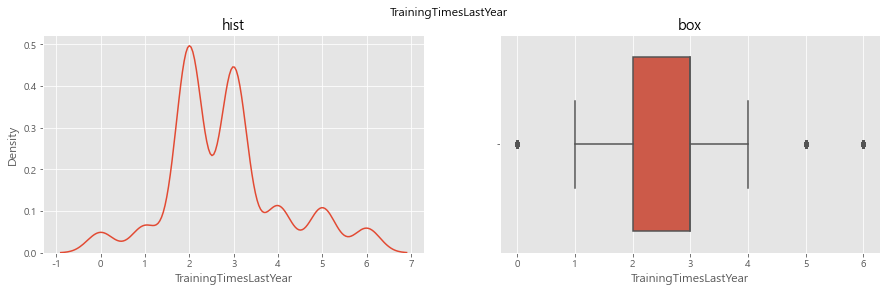

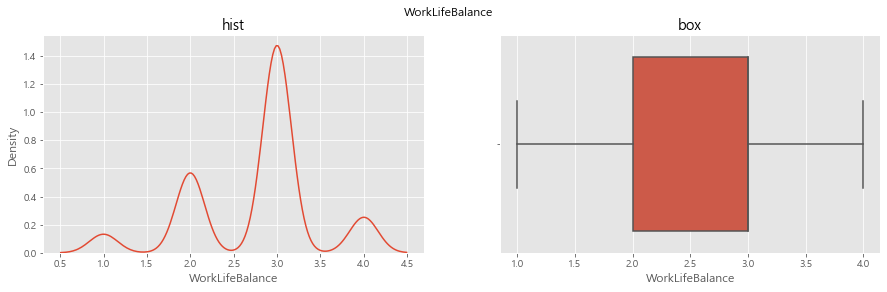

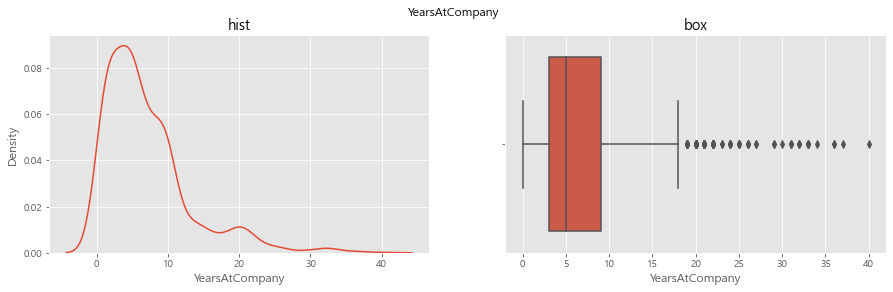

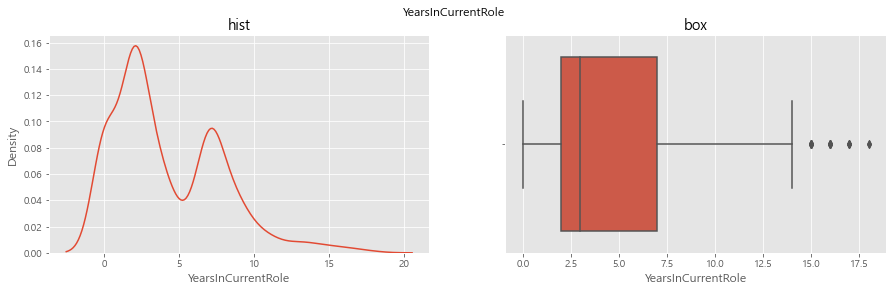

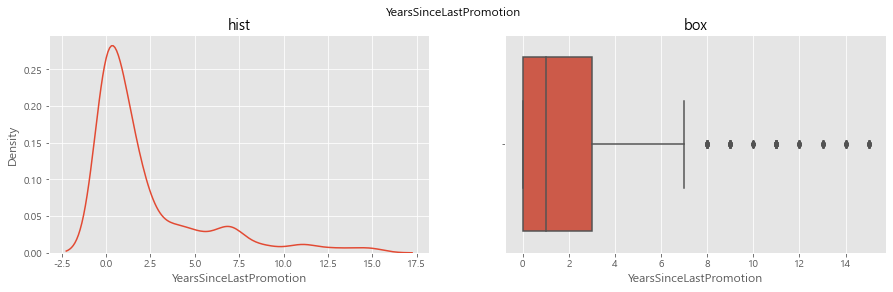

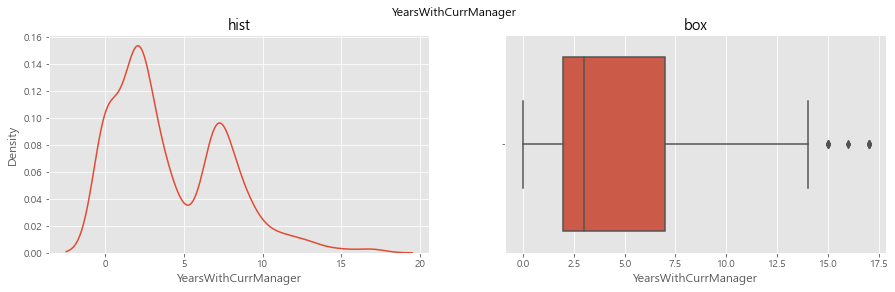

In [172]:
#plot확인
for col in int_col:
    fig, axes = plt.subplots(1, 2,figsize=(15,4))
    sns.kdeplot(df[col],ax = axes[0])
    sns.boxplot(x=col,data=df,ax = axes[1])
    axes[0].set_title("hist")
    axes[1].set_title("box")
    plt.suptitle(col)

In [171]:
print("[outlier 확인 필요한 칼럼]")
outlier_int_col = []
for col in int_col:
    if len(outlier(df,col)) == 0:
        continue
    else :
        outlier_int_col.append(col)
        print(col)

[outlier 확인 필요한 칼럼]
MonthlyIncome
NumCompaniesWorked
PerformanceRating
StockOptionLevel
TotalWorkingYears
TrainingTimesLastYear
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


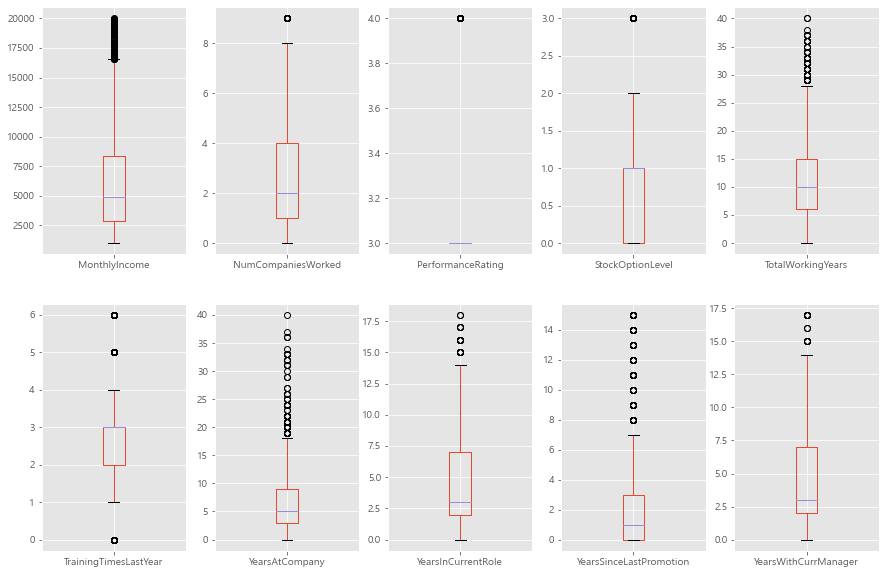

In [33]:
plt.figure(figsize=(15,10))
for i, col in enumerate(outlier_int_col, start=1):
    plt.subplot(2, 5, i)
    df.boxplot(col)

In [87]:
df[outlier_int_col].describe()

,MonthlyIncome,NumCompaniesWorked,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,6502.931293,2.693197,3.153741,0.793878,11.279592,2.799320,7.008163,4.229252,2.187755,4.123129
std,4707.956783,2.498009,0.360824,0.852077,7.780782,1.289271,6.126525,3.623137,3.222430,3.568136
min,1009.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2911.000000,1.000000,3.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,4919.000000,2.000000,3.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,8379.000000,4.000000,3.000000,1.000000,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,19999.000000,9.000000,4.000000,3.000000,40.000000,6.000000,40.000000,18.000000,15.000000,17.000000


In [13]:
# YearsAtCompany 가 MAX 나오는거 가능한지 확인 -> 모든 값이 양수이므로 가능
df['직원입사했을때나이'] = df['Age']-df['YearsAtCompany']
df['직원입사했을때나이'] .describe()

count    1470.000000
mean       29.915646
std         9.281306
min        18.000000
25%        22.000000
50%        28.000000
75%        36.000000
max        59.000000
Name: 직원입사했을때나이, dtype: float64

In [97]:
# TotalWorkingYears 가 MAX 나오는거 가능한지 확인 -> 모든 값이 양수이므로 가능
(df['Age']-df['TotalWorkingYears']).describe()

count    1470.000000
mean       25.644218
std         6.875481
min        18.000000
25%        20.000000
50%        24.000000
75%        30.000000
max        56.000000
dtype: float64

In [103]:
# YearsWithCurrManager 가 MAX 나오는거 가능한지 확인 -> 모든 값이 양수이므로 가능
(df['YearsAtCompany']-df['YearsWithCurrManager']).describe()

count    1470.000000
mean        2.885034
std         4.078666
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        34.000000
dtype: float64

In [104]:
# YearsInCurrentRole 가 MAX 나오는거 가능한지 확인 -> 모든 값이 양수이므로 가능
(df['YearsAtCompany']-df['YearsInCurrentRole']).describe()

count    1470.000000
mean        2.778912
std         4.120310
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        30.000000
dtype: float64

In [175]:
# 칼럼 유니크 값 확인
str_col = []
for col in df.columns :
    if col in df.describe().columns:
        continue
    else :
        str_col.append(col)
        print(col, df[col].unique(),'\n')

Attrition ['Yes' 'No'] 

BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 

Department ['Sales' 'Research & Development' 'Human Resources'] 

EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 

Gender ['Female' 'Male'] 

JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources'] 

MaritalStatus ['Single' 'Married' 'Divorced'] 

Over18 ['Y'] 

OverTime ['Yes' 'No'] 



In [ ]:
'''
Over18 -> 값 1개만 존재 -> 삭제
'''

In [181]:
str_col.remove('Over18')

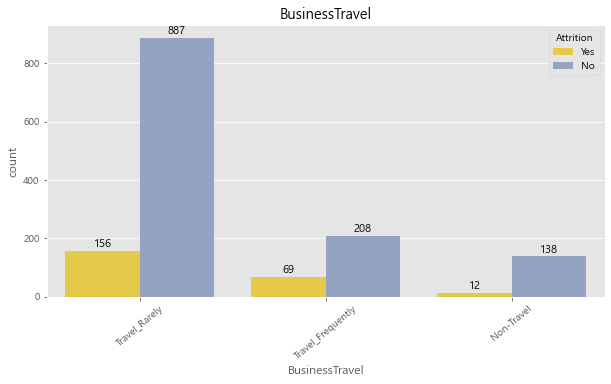

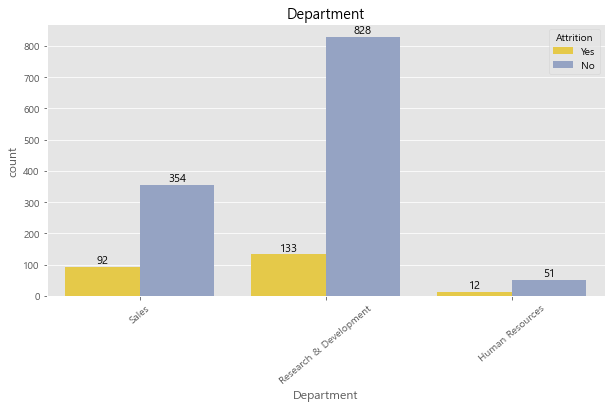

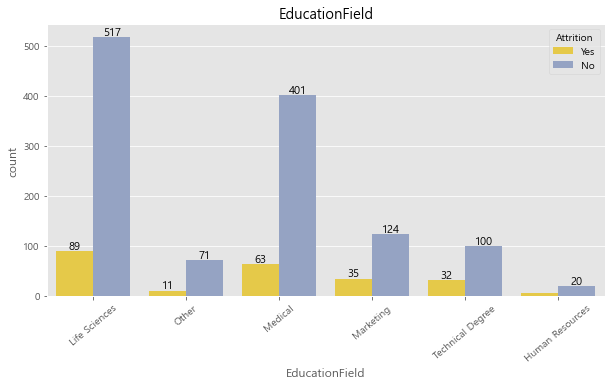

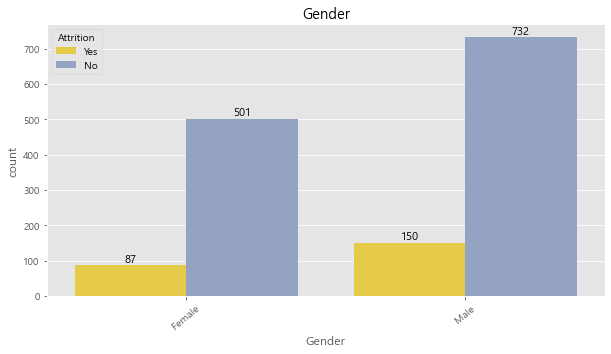

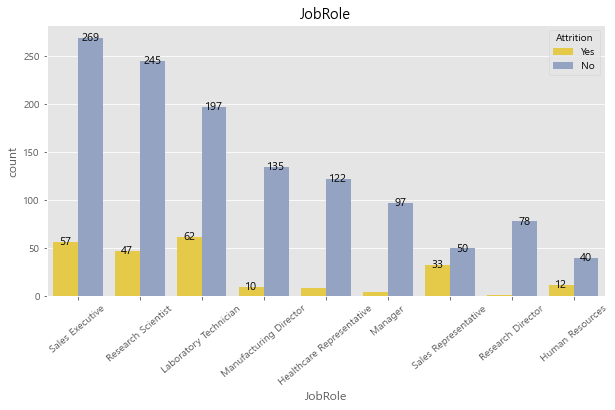

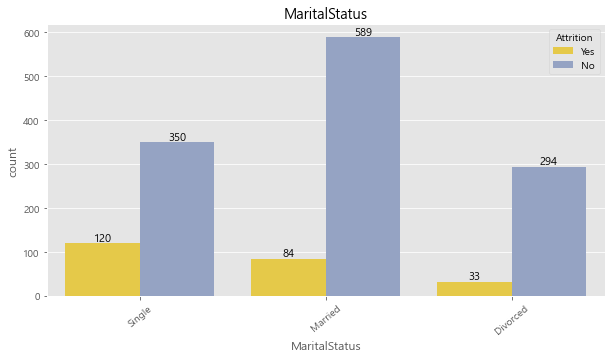

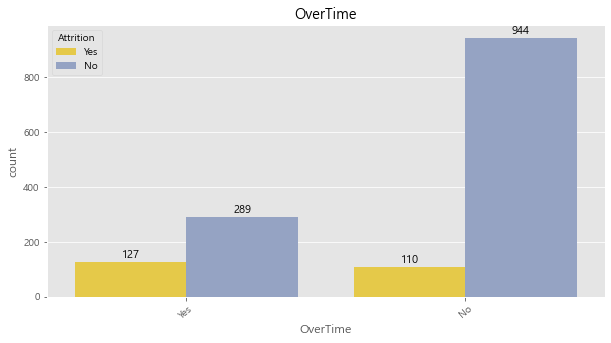

In [183]:
#plot확인
for col in str_col[1:]:
    cnt_plot(df,col,col)

# 3. feature engineering

In [189]:
df['Age2'] = df['Age']//10*10 # 나이대
df['직원입사했을때나이'] = df['Age']-df['YearsAtCompany'] # 입사했을때나이

In [127]:
df['HourlyRate3'] = 0 # 5단위로
df.loc[(df['HourlyRate'] < 35), 'HourlyRate3'] = 30
df.loc[(df['HourlyRate'] >=35) & (df['HourlyRate'] < 40), 'HourlyRate3'] = 35
df.loc[(df['HourlyRate'] >=40) & (df['HourlyRate'] < 45), 'HourlyRate3'] = 40
df.loc[(df['HourlyRate'] >=45) & (df['HourlyRate'] < 50), 'HourlyRate3'] = 45
df.loc[(df['HourlyRate'] >=50) & (df['HourlyRate'] < 55), 'HourlyRate3'] = 50
df.loc[(df['HourlyRate'] >=55) & (df['HourlyRate'] < 60), 'HourlyRate3'] = 55
df.loc[(df['HourlyRate'] >=60) & (df['HourlyRate'] < 65), 'HourlyRate3'] = 60
df.loc[(df['HourlyRate'] >=65) & (df['HourlyRate'] < 70), 'HourlyRate3'] = 65
df.loc[(df['HourlyRate'] >=70) & (df['HourlyRate'] < 75), 'HourlyRate3'] = 70
df.loc[(df['HourlyRate'] >=75) & (df['HourlyRate'] < 80), 'HourlyRate3'] = 75
df.loc[(df['HourlyRate'] >=80) & (df['HourlyRate'] < 85), 'HourlyRate3'] = 80
df.loc[(df['HourlyRate'] >=85) & (df['HourlyRate'] < 90), 'HourlyRate3'] = 85
df.loc[(df['HourlyRate'] >=90) & (df['HourlyRate'] < 95), 'HourlyRate3'] = 90
df.loc[(df['HourlyRate'] >=95) , 'HourlyRate3'] = 95

In [128]:
df['HourlyRate2']=df['HourlyRate']//10*10 # 10단위로

In [159]:
df['MonthlyIncome2'] = df['MonthlyIncome']//1000*1000 # 1000단위로

# 4. 상관관계

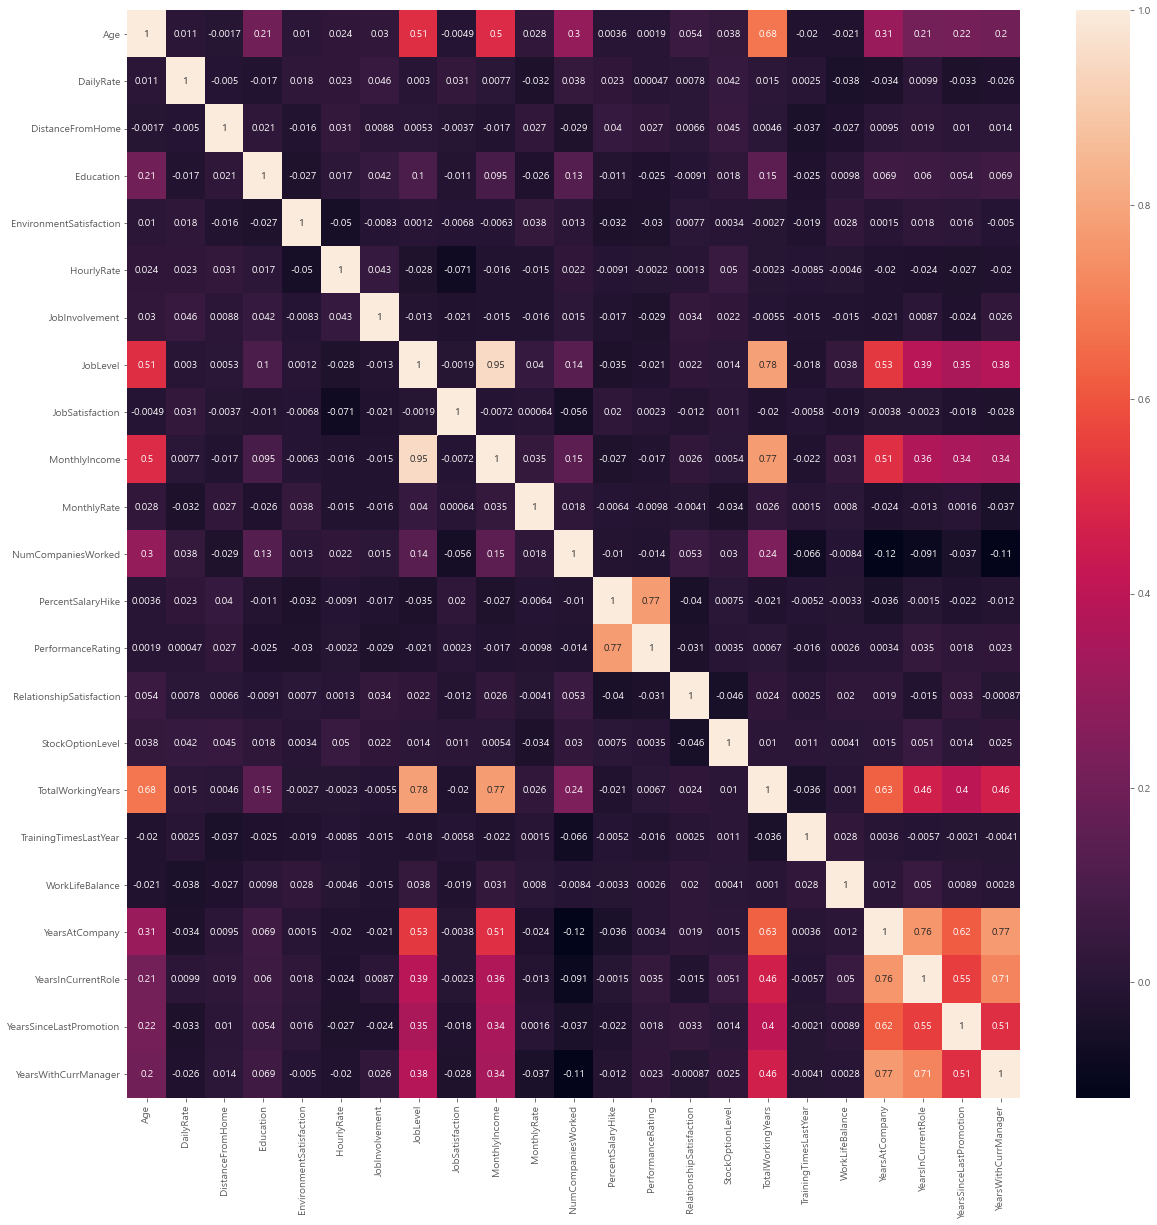

In [47]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,20))
sns.heatmap(df[int_col].corr(), annot=True)
plt.show()

YearsAtCompany              
YearsInCurrentRole          
YearsSinceLastPromotion     
YearsWithCurrManager 상관관계 서로 높음

# 5.시각화 인사이트

In [190]:
df_yes = df[df['Attrition']=='Yes']
df_no = df[df['Attrition']!='Yes']

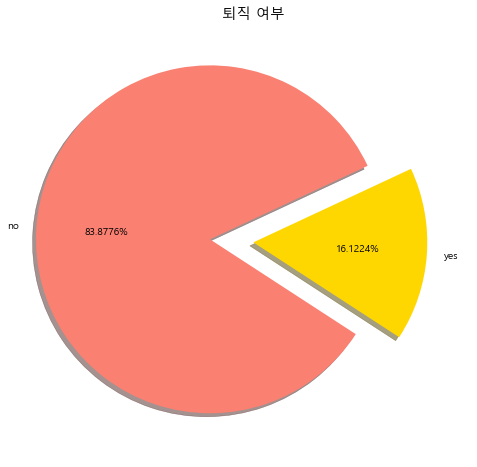

In [204]:
plt.figure(figsize=(8, 8))
ratio = [ len(df_yes),len(df_no)]
labels = [ 'yes', 'no']
explode = [ 0, 0.25]
colors = [ 'gold', 'salmon']
plt.pie(ratio, labels=labels, autopct='%.4f%%', startangle=25, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title('퇴직 여부')
plt.show()

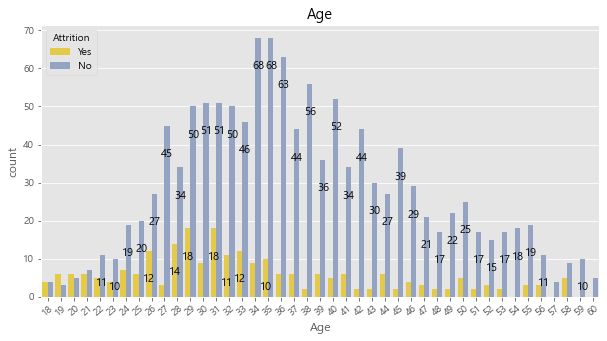

In [131]:
cnt_plot(df,'Age','Age')

In [60]:
df1 = df_yes.groupby(['Age'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df2 = df_no.groupby(['Age'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df3 = pd.merge(df1,df2,on=['Age'],how='outer').fillna(0)
df3['퇴사율'] = df3['cnt_x']*100/(df3['cnt_x']+df3['cnt_y'])

In [61]:
df3.head(3)

,Age,cnt_x,cnt_y,퇴사율
0,18,4.0,4,50.000000
1,19,6.0,3,66.666667
2,20,6.0,5,54.545455


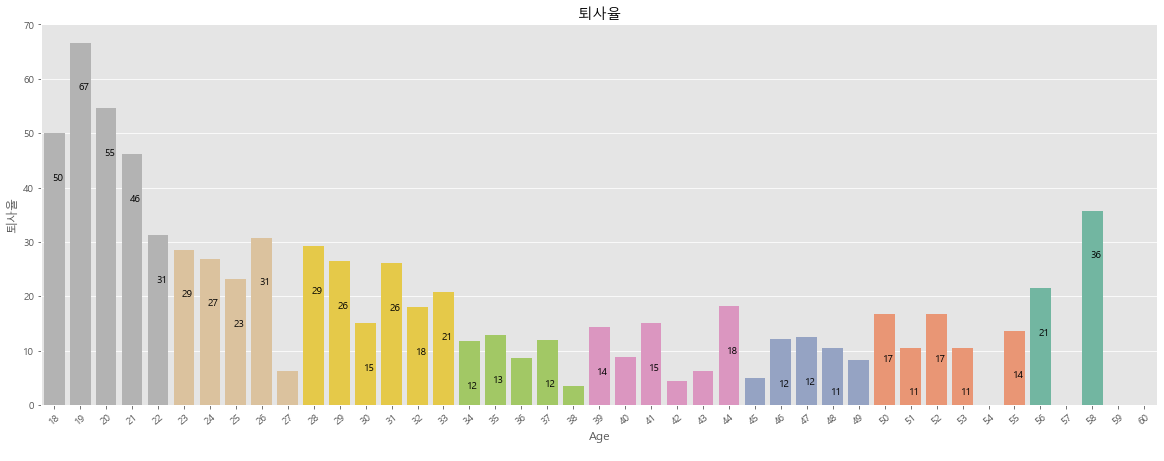

In [62]:
bar_plot(df3,'Age','퇴사율','퇴사율')

In [76]:
df3.sort_values(by=['퇴사율']).tail(4)

,Age,cnt_x,cnt_y,퇴사율
3,21,6.0,7,46.153846
0,18,4.0,4,50.000000
2,20,6.0,5,54.545455
1,19,6.0,3,66.666667


 <span style="color:blue"> → 18~21세에 퇴사율이 높다 </span>

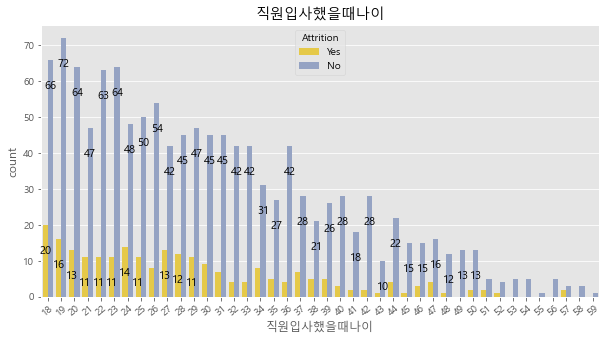

In [15]:
cnt_plot(df,'직원입사했을때나이','직원입사했을때나이')

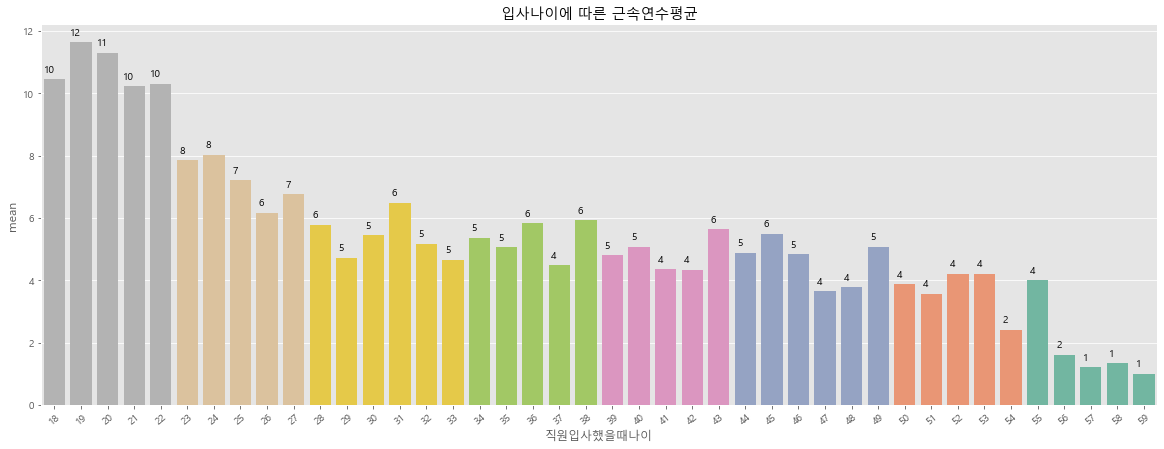

In [91]:
df4 = df.groupby(['직원입사했을때나이'])['YearsAtCompany'].agg([('mean', 'mean')]).reset_index()
bar_plot(df4,'직원입사했을때나이','mean','입사나이에 따른 근속연수평균')

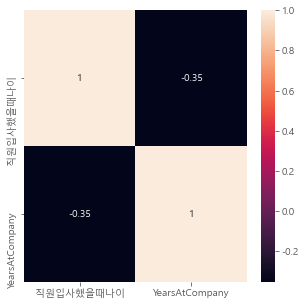

In [92]:
columnlist = ['직원입사했을때나이','YearsAtCompany']
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(5,5))
sns.heatmap(df[columnlist].corr(), annot=True)
plt.show()

 <span style="color:blue"> → 어린나이에 입사한 경우 더 오래 회사에서 일함 </span>

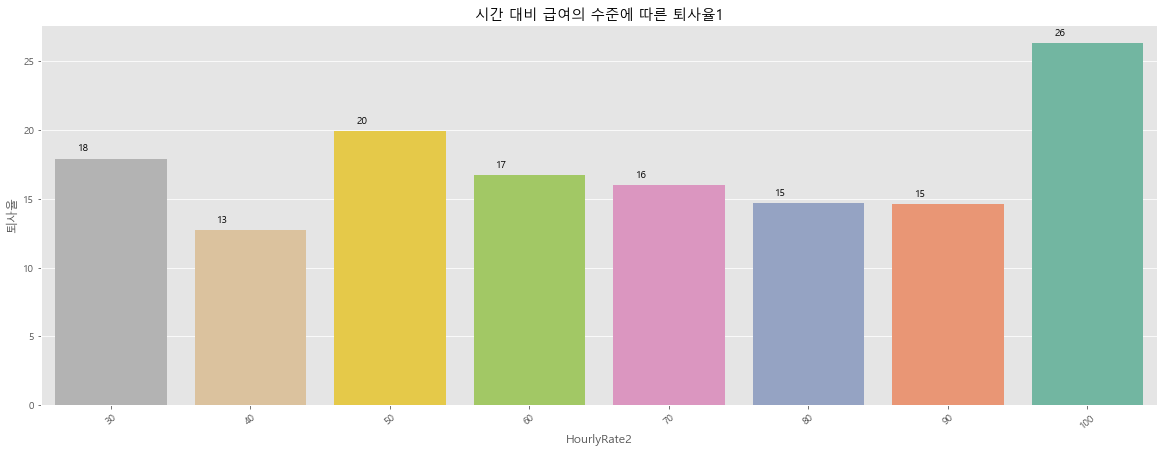

In [136]:
df1 = df_yes.groupby(['HourlyRate2'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df2 = df_no.groupby(['HourlyRate2'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df3 = pd.merge(df1,df2,on=['HourlyRate2'],how='outer').fillna(0)
df3['퇴사율'] = df3['cnt_x']*100/(df3['cnt_x']+df3['cnt_y'])
df3 = df3.sort_values(by=['HourlyRate2']).reset_index(drop=True)
bar_plot(df3,'HourlyRate2','퇴사율','시간 대비 급여의 수준에 따른 퇴사율1')

 <span style="color:blue"> → 100의 경우 같이 묶이는 값이 없어서 이렇게 나온듯 </span>

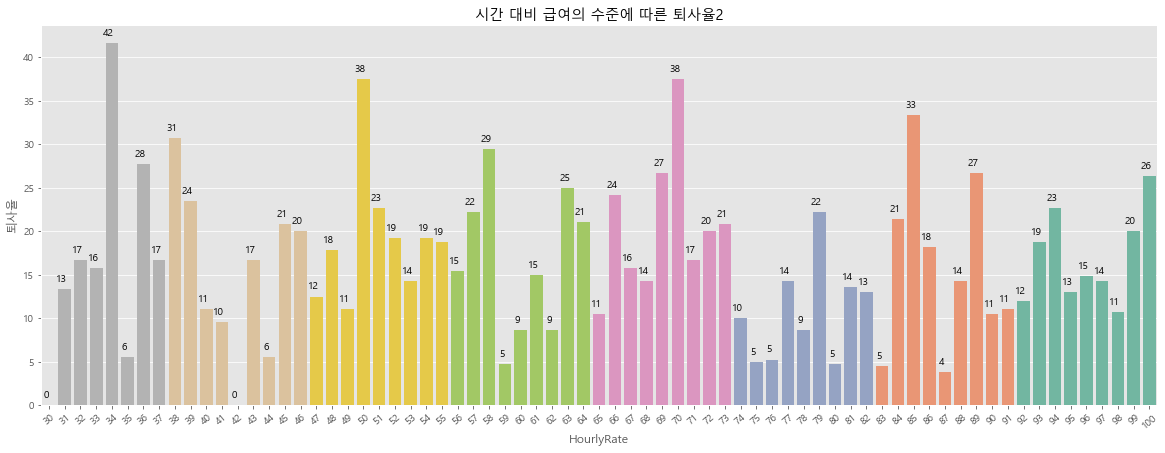

In [137]:
df1 = df_yes.groupby(['HourlyRate'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df2 = df_no.groupby(['HourlyRate'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df3 = pd.merge(df1,df2,on=['HourlyRate'],how='outer').fillna(0)
df3['퇴사율'] = df3['cnt_x']*100/(df3['cnt_x']+df3['cnt_y'])
df3 = df3.sort_values(by=['HourlyRate']).reset_index(drop=True)
bar_plot(df3,'HourlyRate','퇴사율','시간 대비 급여의 수준에 따른 퇴사율2')

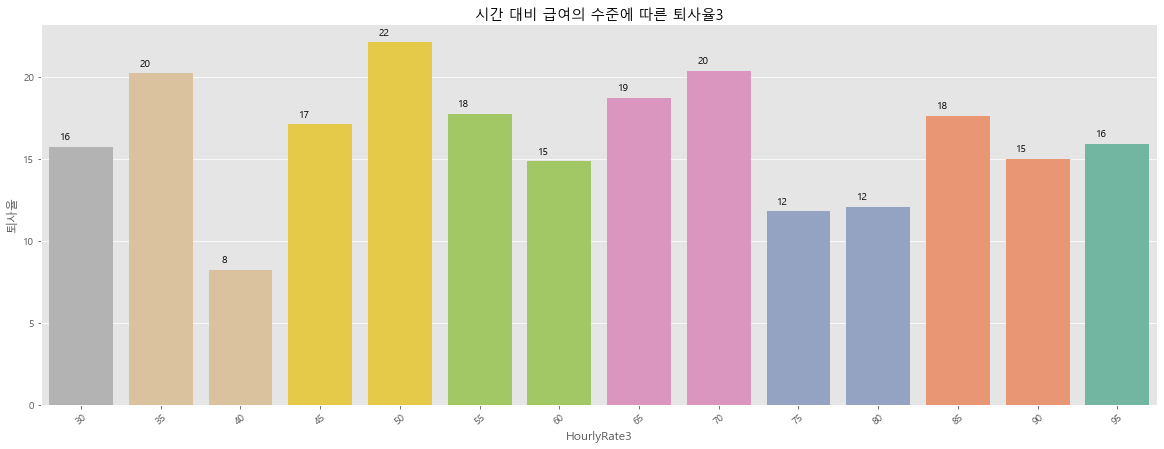

In [139]:
df1 = df_yes.groupby(['HourlyRate3'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df2 = df_no.groupby(['HourlyRate3'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df3 = pd.merge(df1,df2,on=['HourlyRate3'],how='outer').fillna(0)
df3['퇴사율'] = df3['cnt_x']*100/(df3['cnt_x']+df3['cnt_y'])
df3 = df3.sort_values(by=['HourlyRate3']).reset_index(drop=True)
bar_plot(df3,'HourlyRate3','퇴사율','시간 대비 급여의 수준에 따른 퇴사율3')

 <span style="color:blue"> → 원래 값이나 5시간 단위로 묶어서 확인하면 퇴사랑 관련 크게 없어보임 </span>

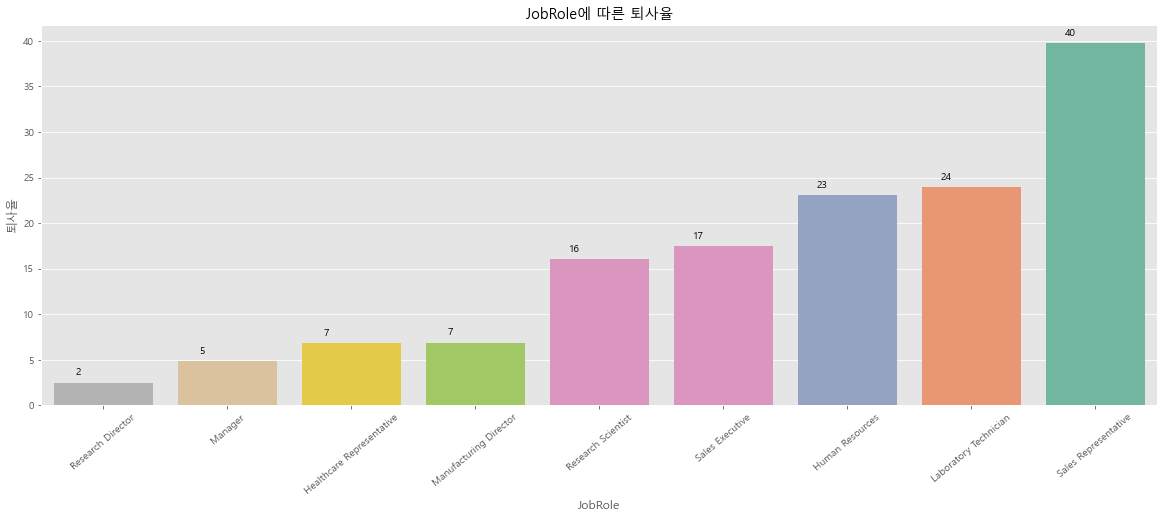

In [141]:
df1 = df_yes.groupby(['JobRole'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df2 = df_no.groupby(['JobRole'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df3 = pd.merge(df1,df2,on=['JobRole'],how='outer').fillna(0)
df3['퇴사율'] = df3['cnt_x']*100/(df3['cnt_x']+df3['cnt_y'])
df3 = df3.sort_values(by=['퇴사율']).reset_index(drop=True)
bar_plot(df3,'JobRole','퇴사율','JobRole에 따른 퇴사율')

 <span style="color:blue"> → Sales Representative, laboratory technicianm, human resources 순으로 퇴사 비율 높음 </span>

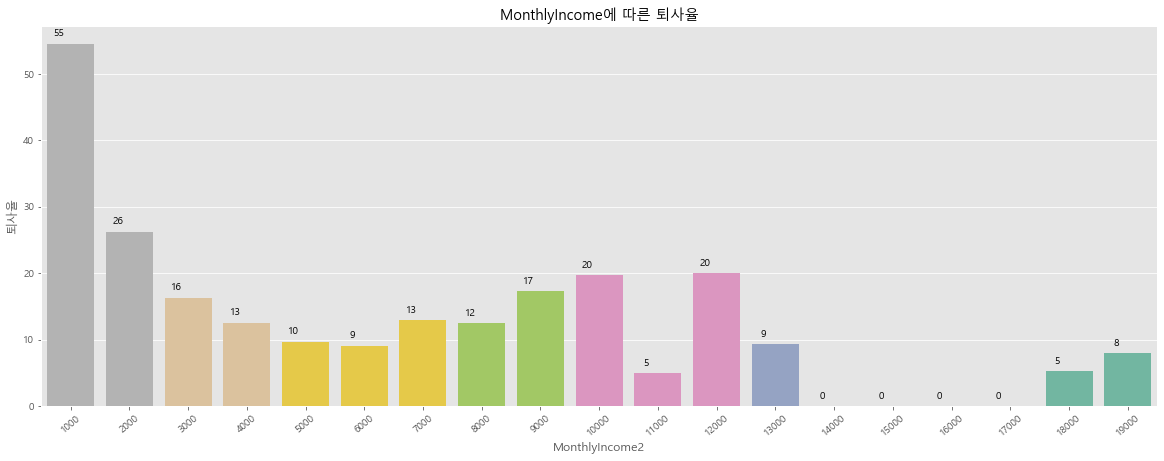

In [161]:
df1 = df_yes.groupby(['MonthlyIncome2'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df2 = df_no.groupby(['MonthlyIncome2'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df3 = pd.merge(df1,df2,on=['MonthlyIncome2'],how='outer').fillna(0)
df3['퇴사율'] = df3['cnt_x']*100/(df3['cnt_x']+df3['cnt_y'])
df3 = df3.sort_values(by=['MonthlyIncome2']).reset_index(drop=True)
bar_plot(df3,'MonthlyIncome2','퇴사율','MonthlyIncome에 따른 퇴사율')

 <span style="color:blue"> → 연봉 낮으면 퇴사율 높음 </span>

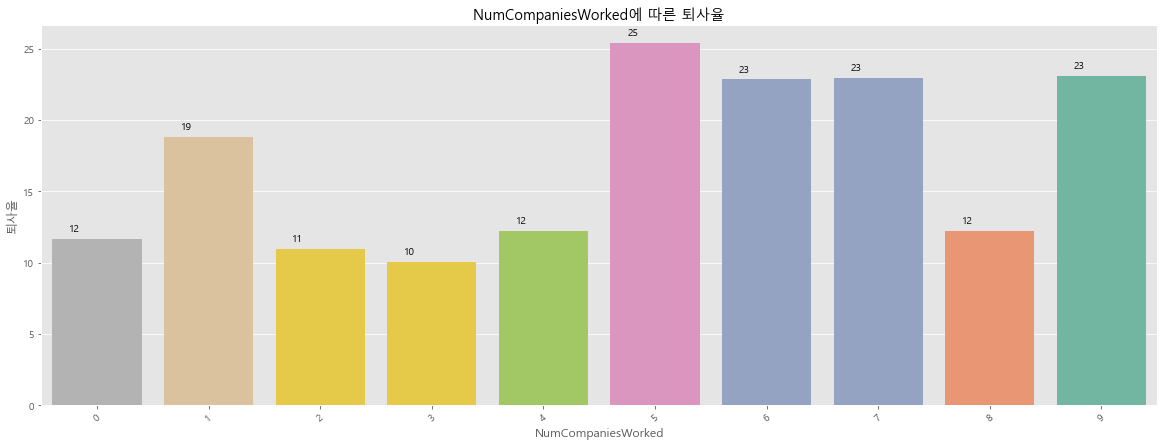

In [206]:
df1 = df_yes.groupby(['NumCompaniesWorked'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df2 = df_no.groupby(['NumCompaniesWorked'])['Attrition'].agg([('cnt', 'count')]).reset_index()
df3 = pd.merge(df1,df2,on=['NumCompaniesWorked'],how='outer').fillna(0)
df3['퇴사율'] = df3['cnt_x']*100/(df3['cnt_x']+df3['cnt_y'])
df3 = df3.sort_values(by=['NumCompaniesWorked']).reset_index(drop=True)
bar_plot(df3,'NumCompaniesWorked','퇴사율','NumCompaniesWorked에 따른 퇴사율')

 <span style="color:blue"> → 이미 이직 많이 했던 사람들이 퇴사 더 많이 함 </span>